In [1]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.5/471.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.79
    Uninstalling langchain-core-0.3.79:
      Successfully uninstalled langchain-core-0.3.79
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.5 which is incompatible.


In [2]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph


In [3]:
class AgentState(TypedDict):
  message:str

def compliment_node(state:AgentState) ->AgentState:
  """Simple node thats give a compliment message to the state """
  state['message']="HEY "+ state["message"] + "YOU ARE GREAT"
  return state

In [4]:
graph=StateGraph(AgentState)
graph.add_node("COMPLIMENT",compliment_node)
graph.set_entry_point("COMPLIMENT")
graph.set_finish_point("COMPLIMENT")
app=graph.compile()


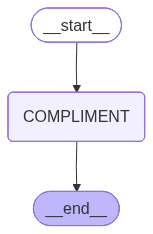

In [5]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result=app.invoke({"message" : "AZlan"})


In [7]:
result

{'message': 'HEY AZlanYOU ARE GREAT'}

In [8]:
from typing import List
class AgentState(TypedDict):
  values:List[int]
  name: str
  results:str

In [9]:
def process_values(state:AgentState) ->AgentState:

  state["results"]=f"HI there {state['name']} the sum of the values is {sum(state['values'])}"
  return state

In [10]:
graph=StateGraph(AgentState)
graph.add_node("Processer",process_values)
graph.set_entry_point("Processer")
graph.set_finish_point("Processer")
app=graph.compile()

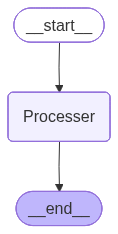

In [11]:
display(Image(app.get_graph().draw_mermaid_png()))

In [12]:
anser=app.invoke({"name":"AZlan","values":[1,2,3,4,5,6,7,8,9,10]})
print(anser)

{'values': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'name': 'AZlan', 'results': 'HI there AZlan the sum of the values is 55'}


In [14]:
class AgentState(TypedDict):
  name:str
  values:list[int]
  operation:str
  result:str

In [15]:
import math
from os import stat
def operation_process(state:AgentState)->AgentState:
  if state["operation"]=="+":

    state["result"]=f"Hi{state['name']} your total values is {sum(state["values"])}"
  elif state['operation']=="*":
    state["result"]=f"Hi{state['name']} your total values is {math.prod(state["values"])}"
  else:
    state["result"]="invalid operation"
  return state

In [16]:
graph=StateGraph(AgentState)
graph.add_node("operation",operation_process)
graph.set_entry_point('operation')
graph.set_finish_point('operation')
app=graph.compile()

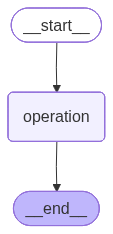

In [17]:
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
answers=app.invoke({"name":"JOHN",'values':[1,26,272,273],'operation':"-"})

In [24]:
print(answers['result'])

invalid operation


In [25]:
class AgentState(TypedDict):
  name: str
  age: int
  skills:list[str]
  result:str

In [32]:
def firstnode(state:AgentState)->AgentState:
  state["result"]=f"hi myself {state["name"]}."
  return state
def secondnode(state:AgentState)->AgentState:
  state["result"]=state["result"]+f"MY age is {state['age']} years old."
  return state
def thirrdnode(state:AgentState)->AgentState:
  state["result"]=state["result"]+f"MY skills are {','.join(state['skills'])}"
  return state

In [33]:
graph=StateGraph(AgentState)
graph.add_node("first",firstnode)
graph.add_node("second",secondnode)
graph.add_node("third",thirrdnode)
graph.add_edge("first","second")
graph.add_edge("second","third")
graph.set_entry_point("first")
graph.set_finish_point("third")
app=graph.compile()

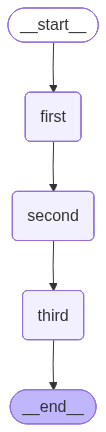

In [34]:
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
result=app.invoke({"name":"JOHN","age": 21,"skills":["python","java","c++"]})

In [37]:
result['result']

'hi myself JOHN.MY age is 21 years old.MY skills are python,java,c++'

In [40]:
class AgentState(TypedDict):
  number1:int
  number2:int
  operation:str
  finalnumber:int
  number3:int
  number4:int
  operation2:str
  finalnumber2:int

In [43]:
def adder(state:AgentState)->AgentState:
  state['finalnumber']=state['number1']+state['number2']
  return state
def subtracter(state:AgentState)->AgentState:
  state['finalnumber2']=state['number1']-state['number2']
  return state
def router1(state:AgentState)->AgentState:
  if state["operation"]=="+":
    return "subtraction"
  elif state["operation"]=="-":
    return "addition"
def adder2(state:AgentState)->AgentState:
  state['finalnumber']=state['number3']+state['number4']
  return state
def subtracter2(state:AgentState)->AgentState:
  state['finalnumber2']=state['number3']-state['number4']
  return state
def router2(state:AgentState)->AgentState:

  if state["operation2"]=="+":
    return "subtraction2"
  elif state["operation2"]=="-":
    return "addition2"

In [48]:
from langgraph.graph import START,END
graph=StateGraph(AgentState)
graph.add_node("adder",adder)
graph.add_node("subracter",subtracter)
graph.add_node("router1",lambda state:state)
graph.add_node("adder2",adder2)
graph.add_node("subracter2",subtracter2)
graph.add_node("router2",lambda state:state)
graph.add_edge(START,"router1")
graph.add_conditional_edges(
    "router1",
    router1,
    {
        "addition": "adder",
        "subtraction": "subracter",
    }
)
graph.add_edge("adder","router2")
graph.add_edge("subracter","router2")
graph.add_conditional_edges(
    "router2",
    router2,
    {
        "addition2": "adder2",
        "subtraction2": "subracter2",
    }
)
graph.add_edge("adder2",END)
graph.add_edge("subracter2",END)

app=graph.compile()



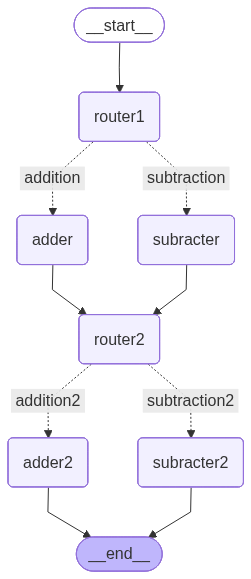

In [49]:
display(Image(app.get_graph().draw_mermaid_png()))

In [50]:
initial_state=AgentState(number1=1,number2=2,operation="+",number3=1,number4=2,operation2="-",finalnumber=0,finalnumber2=0)
result=app.invoke(initial_state)

In [51]:
print(result)

{'number1': 1, 'number2': 2, 'operation': '+', 'finalnumber': 3, 'number3': 1, 'number4': 2, 'operation2': '-', 'finalnumber2': -1}


In [53]:
import random

In [54]:
class GameState(TypedDict):
  player_name:str
  target_number:int
  guesses:list[int]
  attempts:int
  hint:str
  lower_bound:int
  upper_bound:int



In [55]:
def setup_node(state:GameState)->GameState:
  state["player_name"]=f"HI{state['player_name']} WELCOME TO THE GAME"
  state['target_number']=random.randint(1,20)
  state["guesses"]=[]
  state["attempts"]=0
  state["hint"]="GAME STARTED TRY TO GUESS THE NUMBER."
  state["lower_bound"]=1
  state["upper_bound"]=20
  print(f"{state['player_name']}THE GAME HAS BEGUN.I AM THINKING OF A NUMBER BETWEEN {state['lower_bound']} AND {state['upper_bound']}")

  return state

In [56]:
def guess_node(state:GameState)->GameState:
  possible_guesses=[i for i in range(state["lower_bound"],state["upper_bound"]+1)if i not in state["guesses"]]
  if possible_guesses:
    guess=random.choice(possible_guesses)
  else:
    guess=random.randint(state["lower_bound"],state["upper_bound"])
  state['guesses'].append(guess)
  state['attempts']+=1
  print(f"{state['player_name']}YOU GUESSED {guess}")
  return state

In [57]:
def hint_node(state: GameState) -> GameState:
    """Here we provide a hint based on the last guess and update the bounds"""
    latest_guess = state["guesses"][-1]
    target = state["target_number"]

    if latest_guess < target:
        state["hint"] = f"The number {latest_guess} is too low. Try higher!"

        state["lower_bound"] = max(state["lower_bound"], latest_guess + 1)
        print(f"Hint: {state['hint']}")

    elif latest_guess > target:
        state["hint"] = f"The number {latest_guess} is too high. Try lower!"

        state["upper_bound"] = min(state["upper_bound"], latest_guess - 1)
        print(f"Hint: {state['hint']}")
    else:
        state["hint"] = f"Correct! You found the number {target} in {state['attempts']} attempts."
        print(f"Success! {state['hint']}")

    return state

In [59]:
def should_continue(state: GameState) -> str:
    """Determine if we should continue guessing or end the game"""

    # There are 2 end conditions - either 7 is reached or the correct number is guessed

    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "end"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "end"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [60]:
graph = StateGraph(GameState)
graph.add_node("setup", setup_node)
graph.add_node("guess", guess_node)
graph.add_node("hint_node", hint_node)


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")


graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()

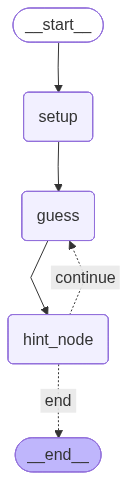

In [61]:

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [64]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})


HIStudent WELCOME TO THE GAMETHE GAME HAS BEGUN.I AM THINKING OF A NUMBER BETWEEN 1 AND 20
HIStudent WELCOME TO THE GAMEYOU GUESSED 15
Success! Correct! You found the number 15 in 1 attempts.
GAME OVER: Number found!
